<a href="https://colab.research.google.com/github/sviteribuben/skillbox/blob/master/Conversions_Voronki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ воронки

In [ ]:
import csv

# name.csv ниже нужно заменить на название csv файла, который вы хотите открыть

funnel = {'home_page':0, 'payment_page':0, 'search_page':0, 'confirmation_page':0,}

with open('./hw/click_stream.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    for row in csv_reader:
#         print(row)
        page = list(row.items())[1][1]
        if page == '1_home_page':
            funnel['home_page'] += 1
        elif page == '3_payment_page':
            funnel['payment_page'] += 1
        elif page == '2_search_page':
            funnel['search_page'] += 1
        elif page == '4_payment_confirmation_page':
            funnel['confirmation_page'] += 1
print(funnel)

{'home_page': 90399, 'payment_page': 6030, 'search_page': 45200, 'confirmation_page': 452}


## Эволюция воронки со временем

In [ ]:
import pandas as pd

funnel_by_month = {}
funnel_template = {'home_page':0, 'payment_page':0, 'search_page':0, 'confirmation_page':0,}

with open('./hw/click_stream2.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    for row in csv_reader:
        
        page = list(row.items())[1][1]
        event_date = list(row.items())[2][1][:-3]
        
        if event_date not in funnel_by_month:
            funnel_by_month[event_date] = funnel_template.copy()            
    
        if page == '1_home_page':
            funnel_by_month[event_date]['home_page'] += 1
        elif page == '2_search_page':
            funnel_by_month[event_date]['search_page'] += 1
        elif page == '3_payment_page':
            funnel_by_month[event_date]['payment_page'] += 1
        else:
            funnel_by_month[event_date]['confirmation_page'] += 1
# funnel
# print(funnel_by_month)
# cols = df.columns.tolist()
# cols
by_date = pd.DataFrame(funnel_by_month)
by_date = by_date[['2015-01', '2015-02', '2015-03', '2015-04']]
# df.plot()
by_date

,2015-01,2015-02,2015-03,2015-04
home_page,22600,22599,22600,22600
payment_page,2390,2412,631,597
search_page,13554,13687,8879,9080
confirmation_page,189,173,44,46


## Эволюция воронки со временем + тип устройства

In [ ]:
with open('./hw/click_stream2.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    funnels = {}
    

    # проходим циклом по объекту csv_reader
    for row in csv_reader: # берем строку из объекта csv_reader

        page = list(row.items())[1][1] # вытаскиваем название страницы
        event_date = list(row.items())[2][1][:-3] # вытаскиваем дату в формате YYYY-MM
        device = list(row.items())[3][1]
#         gender = list(row.items())[4][1]
#         print(gender)
        
        funnel_key = device+'_'+event_date
       
        # проверяем существует ли ключ в словаре
        if funnel_key not in funnels: # если нет
            funnels[funnel_key] = {}  # создаем такой ключ, в значение ставим пустой словарь

        # проверяем существует ли ключ с названием страницы в словаре
        if page not in funnels[funnel_key]:
            funnels[funnel_key][page] = 1 # если нет, создаем ключ и присваеваем значение "единица"
        else:
            funnels[funnel_key][page] += 1 # если существует, увеличиваем значение по ключу на единицу

devices = pd.DataFrame(funnels)
# cols = df_2.columns.tolist()
# cols
devices = devices[['Desktop_2015-01', 'Mobile_2015-01', 'Desktop_2015-02', 'Mobile_2015-02', 'Desktop_2015-03', 'Mobile_2015-03', 'Desktop_2015-04', 'Mobile_2015-04']]
devices.T

,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page
Desktop_2015-01,15050,7529,1221,60
Mobile_2015-01,7550,6025,1169,129
Desktop_2015-02,15049,7632,1191,54
Mobile_2015-02,7550,6055,1221,119
Desktop_2015-03,15050,7370,296,14
Mobile_2015-03,7550,1509,335,30
Desktop_2015-04,15050,7569,302,22
Mobile_2015-04,7550,1511,295,24


# Влияние пола, девайса на трафик и продажи во временном разрезе 

,1_home_page,2_search_page,3_payment_page,4_payment_confirmation_page,PERCENT
m01/15_PC,7504,3678,596,27,0.359808
m01/15_MOB,3682,2963,551,53,1.439435
f01/15_PC,7546,3851,625,33,0.437318
f01/15_MOB,3868,3062,618,76,1.964840
m02/15_PC,7602,3832,586,28,0.368324
m02/15_MOB,3799,3035,591,59,1.553040
f02/15_PC,7447,3800,605,26,0.349134
f02/15_MOB,3751,3020,630,60,1.599573
m03/15_PC,7538,3663,134,8,0.106129
m03/15_MOB,3812,762,160,10,0.262329


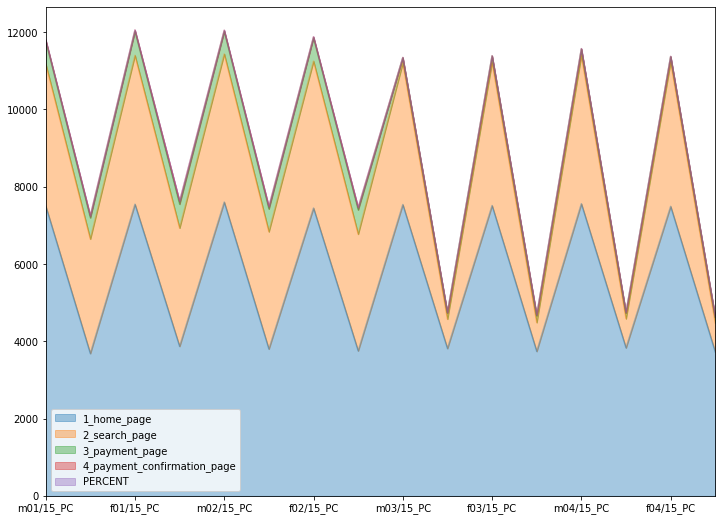

In [ ]:
import matplotlib.pyplot as plt

with open('./hw/click_stream3.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    funnels = {}
    
    # проходим циклом по объекту csv_reader
    for row in csv_reader: # берем строку из объекта csv_reader

        page = list(row.items())[1][1] # вытаскиваем название страницы
        event_date = list(row.items())[2][1][:-3] # вытаскиваем дату в формате YYYY-MM
        device = list(row.items())[3][1]
        gender = list(row.items())[4][1]
#         print(device)
        
        funnel_key = gender+'_'+device+'_'+event_date
       
        # проверяем существует ли ключ в словаре
        if funnel_key not in funnels: # если нет
            funnels[funnel_key] = {}  # создаем такой ключ, в значение ставим пустой словарь

        # проверяем существует ли ключ с названием страницы в словаре
        if page not in funnels[funnel_key]:
            funnels[funnel_key][page] = 1 # если нет, создаем ключ и присваеваем значение "единица"
        else:
            funnels[funnel_key][page] += 1 # если существует, увеличиваем значение по ключу на единицу
            
by_gender = pd.DataFrame(funnels, columns=['Male_Desktop_2015-01',                                                                                     
                                           'Male_Mobile_2015-01',
                                           'Female_Desktop_2015-01', 
                                           'Female_Mobile_2015-01',                                           
                                          'Male_Desktop_2015-02', 
                                           'Male_Mobile_2015-02',
                                           'Female_Desktop_2015-02',                                             
                                           'Female_Mobile_2015-02',                                          
                                          'Male_Desktop_2015-03',
                                           'Male_Mobile_2015-03',
                                           'Female_Desktop_2015-03',                                            
                                           'Female_Mobile_2015-03',                                          
                                          'Male_Desktop_2015-04',
                                           'Male_Mobile_2015-04',
                                           'Female_Desktop_2015-04',                                            
                                           'Female_Mobile_2015-04'])

# cols = df_1.columns.tolist()
# cols
by_gender = by_gender.rename(columns={'Male_Desktop_2015-01': 'm01/15_PC', 
                                      'Female_Desktop_2015-01': 'f01/15_PC',
                                      'Male_Mobile_2015-01': 'm01/15_MOB', 
                                      'Female_Mobile_2015-01': 'f01/15_MOB',
                                      'Male_Desktop_2015-02': 'm02/15_PC', 
                                      'Female_Desktop_2015-02': 'f02/15_PC',
                                      'Male_Mobile_2015-02': 'm02/15_MOB', 
                                      'Female_Mobile_2015-02': 'f02/15_MOB',
                                     'Male_Desktop_2015-03': 'm03/15_PC', 
                                      'Female_Desktop_2015-03': 'f03/15_PC',
                                      'Male_Mobile_2015-03': 'm03/15_MOB', 
                                      'Female_Mobile_2015-03': 'f03/15_MOB',
                                      'Male_Desktop_2015-04': 'm04/15_PC', 
                                      'Female_Desktop_2015-04': 'f04/15_PC',
                                      'Male_Mobile_2015-04': 'm04/15_MOB', 
                                      'Female_Mobile_2015-04': 'f04/15_MOB'})
transp_gender = by_gender.T
transp_gender['PERCENT'] = transp_gender['4_payment_confirmation_page'] / transp_gender['1_home_page'] * 100
transp_gender.plot.area(alpha = 0.4, figsize =(12, 9))
transp_gender

<b>ВЫВОД:</b> проблема, выявленная предыдущим анализом подтверждается и после добавления гендерного различия пользователей. Замечено, что если у женщин идет постоянно снижение оплат через сайт и соответственно выход на 4_payment_confirmation_page, то у мужчин после явного проблемного периода на сайте (февраль-март) замечен незначительный рост как на 4_payment_confirmation_page так и 3_payment_page.